## We want to create a neural network with Keras that beats this Matlab implementation:

![Matlab loss](loss.jpg)

![Matlab fit](fit.jpg)

In [8]:
from matplotlib.pyplot import plot, legend
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

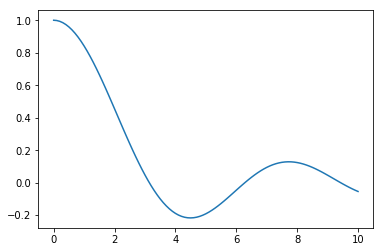

In [9]:
# Prepare data just like in Matlab
x = np.arange(0, 10.1, 0.1)

def sinc(x):
    if x == 0:
        return 1
    else:
        return (np.sin(x) / x)
    
y = [sinc(val) for val in x]

plot(x,y)

In [10]:
# Create a model with one hidden layer, just like in Matlab

model = Sequential()
model.add(Dense(10, input_shape=(1,)))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('linear'))

opti = Adam()

model.compile(optimizer=opti,
              loss='mean_squared_error')

In [11]:
# Train the model

history = model.fit(x, y, epochs=100, validation_split=0.15)

Train on 85 samples, validate on 16 samples
Epoch 1/100
85/85 [==============================] - 0s 2ms/step - loss: 0.2018 - val_loss: 0.0040
Epoch 2/100
85/85 [==============================] - 0s 72us/step - loss: 0.1950 - val_loss: 0.0036
Epoch 3/100
85/85 [==============================] - 0s 83us/step - loss: 0.1886 - val_loss: 0.0036
Epoch 4/100
85/85 [==============================] - 0s 74us/step - loss: 0.1822 - val_loss: 0.0030
Epoch 5/100
85/85 [==============================] - 0s 129us/step - loss: 0.1762 - val_loss: 0.0024
Epoch 6/100
85/85 [==============================] - 0s 142us/step - loss: 0.1707 - val_loss: 0.0019
Epoch 7/100
85/85 [==============================] - 0s 71us/step - loss: 0.1649 - val_loss: 0.0015
Epoch 8/100
85/85 [==============================] - 0s 112us/step - loss: 0.1595 - val_loss: 0.0014
Epoch 9/100
85/85 [==============================] - 0s 86us/step - loss: 0.1542 - val_loss: 0.0015
Epoch 10/100
85/85 [==============================] - 

85/85 [==============================] - 0s 92us/step - loss: 0.0256 - val_loss: 0.0110
Epoch 82/100
85/85 [==============================] - 0s 78us/step - loss: 0.0250 - val_loss: 0.0105
Epoch 83/100
85/85 [==============================] - 0s 68us/step - loss: 0.0246 - val_loss: 0.0100
Epoch 84/100
85/85 [==============================] - 0s 161us/step - loss: 0.0241 - val_loss: 0.0093
Epoch 85/100
85/85 [==============================] - 0s 146us/step - loss: 0.0237 - val_loss: 0.0087
Epoch 86/100
85/85 [==============================] - 0s 136us/step - loss: 0.0233 - val_loss: 0.0090
Epoch 87/100
85/85 [==============================] - 0s 85us/step - loss: 0.0228 - val_loss: 0.0085
Epoch 88/100
85/85 [==============================] - 0s 84us/step - loss: 0.0224 - val_loss: 0.0076
Epoch 89/100
85/85 [==============================] - 0s 80us/step - loss: 0.0219 - val_loss: 0.0076
Epoch 90/100
85/85 [==============================] - 0s 89us/step - loss: 0.0216 - val_loss: 0.0071


Loss at last step: 0.018190
Validation loss at last step: 0.006270


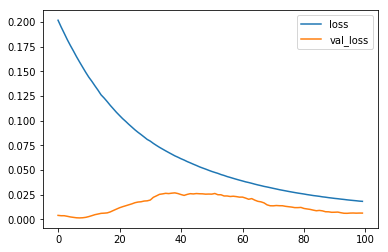

In [12]:
# Print loss graph

loss = history.history['loss']
val_loss = history.history['val_loss']
print("Loss at last step: %f" % loss[-1])
print("Validation loss at last step: %f" % val_loss[-1])
plot(loss, label='loss')
plot(val_loss, label='val_loss')
legend(loc='upper right')

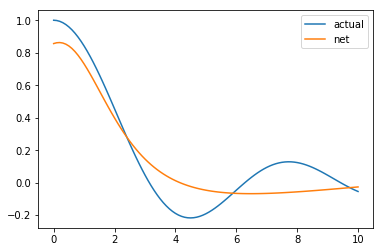

In [13]:
# Print both curves to show fit
y_net = model.predict(x)
plot(x, y, label='actual')
plot(x, y_net, label='net')
legend(loc='upper right')